# 🏁 Introduction

The most important aspect of Herbie is the **Herbie class** which represents a single model output file. When you create a **Herbie object**, Herbie looks for model data at different sources until the requested file is found.

Herbie can discover data for many different models and sources, including: 

- [High Resolution Rapid Refresh (HRRR)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/hrrr.html) and [HRRR-Alaska](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/hrrrak.html)
- [Rapid Refresh (RAP)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/rap.html)
- [Global Forecast System (GFS)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/gfs.html)
- [Global Ensemble Forecast System (GEFS)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/gefs.html)
- [ECMWF Open Data Forecast Products](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/ecmwf.html)
- [North American Mesoscale Model (NAM)](https://github.com/blaylockbk/Herbie/blob/main/docs/user_guide/_model_notebooks/nam.ipynb)
- [National Blend of Models (NBM)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/nbm.html)
- [Rapid Refresh Forecast System - Prototype (RRFS)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/rrfs.html)
- [Real-Time/Un-Restricted Mesoscale Analysis (RTMA/URMA)](https://herbie.readthedocs.io/en/latest/user_guide/_model_notebooks/rtma.html)

This example shows how to create a Herbie object for the HRRR model `sfc` product and 6 hour forecast. The file was found an Amazon Web Services.

In [1]:
from herbie import Herbie

In [2]:
H = Herbie(
    "2021-07-01 12:00",  # model run date
    model="hrrr",  # model name
    product="sfc",  # model produce name (model dependent)
    fxx=6,  # forecast lead time
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jul-01 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


This Herbie object tells us the file we requested is located on Amazon Web Services (`aws`).
We can get the specific file locations like this

In [3]:
# Location of GRIB file
H.grib

'https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210701/conus/hrrr.t12z.wrfsfcf06.grib2'

In [4]:
# Locatin of index file
H.idx

'https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210701/conus/hrrr.t12z.wrfsfcf06.grib2.idx'


## Inventory data

Herbie can read the GRIB `.idx` file and show us the file contents. Pay attention to the "search_this" column; this will help you locate data you want to get.

In [5]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,732286,0-732286,2021-07-01 12:00:00,2021-07-01 18:00:00,REFC,entire atmosphere,6 hour fcst,:REFC:entire atmosphere:6 hour fcst
1,2,732286,995058,732286-995058,2021-07-01 12:00:00,2021-07-01 18:00:00,RETOP,cloud top,6 hour fcst,:RETOP:cloud top:6 hour fcst
2,3,995058,1624938,995058-1624938,2021-07-01 12:00:00,2021-07-01 18:00:00,var discipline=0 center=7 local_table=1 parmca...,entire atmosphere,6 hour fcst,:var discipline=0 center=7 local_table=1 parmc...
3,4,1624938,2022954,1624938-2022954,2021-07-01 12:00:00,2021-07-01 18:00:00,VIL,entire atmosphere,6 hour fcst,:VIL:entire atmosphere:6 hour fcst
4,5,2022954,3506858,2022954-3506858,2021-07-01 12:00:00,2021-07-01 18:00:00,VIS,surface,6 hour fcst,:VIS:surface:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
168,169,165391784,165392017,165391784-165392017,2021-07-01 12:00:00,2021-07-01 18:00:00,ICEC,surface,6 hour fcst,:ICEC:surface:6 hour fcst
169,170,165392017,166943204,165392017-166943204,2021-07-01 12:00:00,2021-07-01 18:00:00,SBT123,top of atmosphere,6 hour fcst,:SBT123:top of atmosphere:6 hour fcst
170,171,166943204,168748489,166943204-168748489,2021-07-01 12:00:00,2021-07-01 18:00:00,SBT124,top of atmosphere,6 hour fcst,:SBT124:top of atmosphere:6 hour fcst
171,172,168748489,170183231,168748489-170183231,2021-07-01 12:00:00,2021-07-01 18:00:00,SBT113,top of atmosphere,6 hour fcst,:SBT113:top of atmosphere:6 hour fcst


To filter the data, we pass a regular expersion to the `search` argument to narrow down the data we are looking at.

In [6]:
# All fields at 2-m above ground level
H.inventory(search=":2 m above ground")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
57,58,36726771,36800624,36726771-36800624,2021-07-01 12:00:00,2021-07-01 18:00:00,LTPINX,2 m above ground,6 hour fcst,:LTPINX:2 m above ground:6 hour fcst
70,71,45923913,47210721,45923913-47210721,2021-07-01 12:00:00,2021-07-01 18:00:00,TMP,2 m above ground,6 hour fcst,:TMP:2 m above ground:6 hour fcst
71,72,47210721,48413736,47210721-48413736,2021-07-01 12:00:00,2021-07-01 18:00:00,POT,2 m above ground,6 hour fcst,:POT:2 m above ground:6 hour fcst
72,73,48413736,50096124,48413736-50096124,2021-07-01 12:00:00,2021-07-01 18:00:00,SPFH,2 m above ground,6 hour fcst,:SPFH:2 m above ground:6 hour fcst
73,74,50096124,51301645,50096124-51301645,2021-07-01 12:00:00,2021-07-01 18:00:00,DPT,2 m above ground,6 hour fcst,:DPT:2 m above ground:6 hour fcst
74,75,51301645,52912610,51301645-52912610,2021-07-01 12:00:00,2021-07-01 18:00:00,RH,2 m above ground,6 hour fcst,:RH:2 m above ground:6 hour fcst


In [7]:
# All fields at 500 hPa
H.inventory(search=":500 mb:")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
13,14,8554318,9241381,8554318-9241381,2021-07-01 12:00:00,2021-07-01 18:00:00,HGT,500 mb,6 hour fcst,:HGT:500 mb:6 hour fcst
14,15,9241381,9772736,9241381-9772736,2021-07-01 12:00:00,2021-07-01 18:00:00,TMP,500 mb,6 hour fcst,:TMP:500 mb:6 hour fcst
15,16,9772736,10740730,9772736-10740730,2021-07-01 12:00:00,2021-07-01 18:00:00,DPT,500 mb,6 hour fcst,:DPT:500 mb:6 hour fcst
16,17,10740730,11334832,10740730-11334832,2021-07-01 12:00:00,2021-07-01 18:00:00,UGRD,500 mb,6 hour fcst,:UGRD:500 mb:6 hour fcst
17,18,11334832,11929655,11334832-11929655,2021-07-01 12:00:00,2021-07-01 18:00:00,VGRD,500 mb,6 hour fcst,:VGRD:500 mb:6 hour fcst


In [8]:
# U and V wind at 10-m above ground
H.inventory("(?:U|V)GRD:10 m")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
76,77,53199960,55581575,53199960-55581575,2021-07-01 12:00:00,2021-07-01 18:00:00,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
77,78,55581575,57963190,55581575-57963190,2021-07-01 12:00:00,2021-07-01 18:00:00,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst


In [9]:
# Winds at 500 and 800 hPa
H.inventory("[U|V]GRD:[8|5][0|5]0 mb")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
16,17,10740730,11334832,10740730-11334832,2021-07-01 12:00:00,2021-07-01 18:00:00,UGRD,500 mb,6 hour fcst,:UGRD:500 mb:6 hour fcst
17,18,11334832,11929655,11334832-11929655,2021-07-01 12:00:00,2021-07-01 18:00:00,VGRD,500 mb,6 hour fcst,:VGRD:500 mb:6 hour fcst
27,28,18875970,19498869,18875970-19498869,2021-07-01 12:00:00,2021-07-01 18:00:00,UGRD,850 mb,6 hour fcst,:UGRD:850 mb:6 hour fcst
28,29,19498869,20112882,19498869-20112882,2021-07-01 12:00:00,2021-07-01 18:00:00,VGRD,850 mb,6 hour fcst,:VGRD:850 mb:6 hour fcst


This ability to filter the GRIB messages is powerful, because it can also help you download subsets of the data. Here are some other useful examples.

`search=`|GRIB messages that will be downloaded
--|--
`":TMP:2 m"`|Temperature at 2 m.
`":TMP:"`|Temperature fields at all levels.
`":UGRD:\d+ mb"`|U Wind at all pressure levels.
`":500 mb:"`|All variables on the 500 mb level.
`":APCP:"`|All accumulated precipitation fields.
`":APCP:surface:0-[1-9]*"`|Accumulated precip since initialization time
`":APCP:.*:(?:0-1\|[1-9]\d*-\d+) hour"`|Accumulated precip over last hour
`":UGRD:10 m"`|U wind component at 10 meters.
`":[U\|V]GRD:[1,8]0 m"` |U and V wind component at 10 and 80 m.
`":[U\|V]GRD:"` |U and V wind component at all levels.
`":.GRD:"`|(Same as above)
`":[U\|V]GRD:\d+ hybrid"` |U and V wind components at all hybrid levels
`":[U\|V]GRD:\d+ mb"` |U and V wind components at all pressure levels
`":(?:TMP\|DPT):"`|Temperature and Dew Point for all levels .
`":(?:TMP\|DPT\|RH):"`|TMP, DPT, and Relative Humidity for all levels.
`":REFC:"`|Composite Reflectivity
`":surface:"`|All variables at the surface.
`"^TMP:2 m.*fcst$"`|Beginning of string (^), end of string ($) wildcard (.*)

If you need help with regular expression, search the web
or look at this [cheatsheet](https://www.petefreitag.com/cheatsheets/regex/).

## Read data with xarray

> Note: You should *always* subset the file before reading it with xarray else you will likely load too much data into memory.

> Note: If you request data on conflicting levels (e.g., 2-m above ground and 500 mb), cfgrib will return the data as a list of datasets where each dataset is a compatible hypercube.

Let's download the 2-m Temperature and 2-m Relative Humidity fields, and read them with xarray.

In [10]:
ds = H.xarray(":(?:TMP|RH):2 m", remove_grib=False)

# Note: I set remove_grib=False because I didn't want to
# delete the GRIB file after I read it with xarray. By
# default, Herbie will remove the downloaded GRIB subset
# after it reads it.

👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\hrrr\20210701]


In [11]:
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-07-01T12:00:00
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-07-01T18:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    r2                   (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20210701\subset_e7b2...
    search:            :(?:TMP|RH):2 m

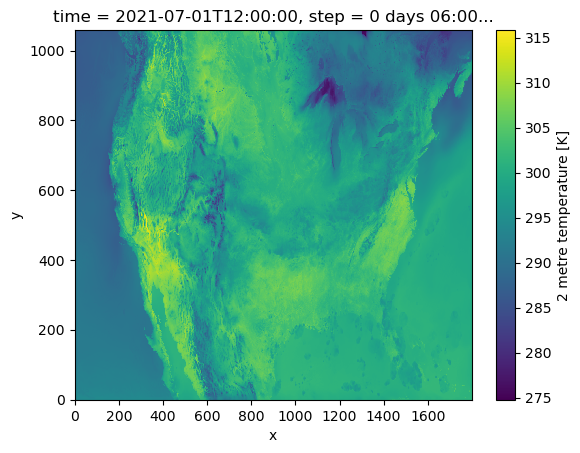

In [12]:
ds.t2m.plot()

I won't go into detail here about plotting this data on a map, but check out some Cartopy and Metpy tutorials.

## Downloading Data

You don't have to use the xarray method to get the data. Maybe you have another tool you like for reading GRIB data. You can still use Herbie to download the full file or a subset of the file locally.

> Hopefully you have a good internet connection, some files are large.

In [13]:
# Download a full file
H = Herbie("2022-01-01 06", fxx=0)
H.download()

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Jan-01 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\hrrr\20220101]


WindowsPath('C:/Users/blaylock/data/hrrr/20220101/hrrr.t06z.wrfsfcf00.grib2')

In [14]:
# Download a subset file
# All variables at 2-m above ground
H = Herbie("2022-01-01 06", fxx=0)
H.download(":2 m above ground:", verbose=True)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Jan-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
📇 Download subset: ▌▌Herbie HRRR model sfc product initialized 2022-Jan-01 06:00 UTC F00 ┊ source=local                                                            
 cURL from file://C:\Users\blaylock\data\hrrr\20220101\hrrr.t06z.wrfsfcf00.grib2
  58  :var discipline=0 master_table=2 parmcat=17 parm=1:2 m above ground:anl
  71  :TMP:2 m above ground:anl
  72  :POT:2 m above ground:anl
  73  :SPFH:2 m above ground:anl
  74  :DPT:2 m above ground:anl
  75  :RH:2 m above ground:anl
💾 Saved the subset to C:\Users\blaylock\data\hrrr\20220101\subset_1bef7d97__hrrr.t06z.wrfsfcf00.grib2


WindowsPath('C:/Users/blaylock/data/hrrr/20220101/subset_1bef7d97__hrrr.t06z.wrfsfcf00.grib2')

If we ask to download this file again, Herbie tells us we already have a local copy. But we can overwrite if you need to using the `overwrite=True` argument.

In [16]:
# Already have a local copy downloaded
H = Herbie("2022-01-01 06", fxx=0)
H.download(":2 m above ground:", verbose=True)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Jan-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
🌉 Already have local copy --> C:\Users\blaylock\data\hrrr\20220101\subset_1bef7d97__hrrr.t06z.wrfsfcf00.grib2


WindowsPath('C:/Users/blaylock/data/hrrr/20220101/subset_1bef7d97__hrrr.t06z.wrfsfcf00.grib2')

---

🏁 And there you have it! You have learned the basic's of Herbie for discovering, exploring, downloading, and reading weather model data.